# Group 2 Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

In [51]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [52]:
#establish connection to data
dognitiondf = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")
data = dognitiondf
display(dognitiondf)

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [53]:
dognitiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [54]:
#checking missing values
missing_values = dognitiondf.isnull().sum()
missing_percent = (dognitiondf.isnull().sum()/len(dognitiondf))*100
print(pd.concat([missing_values, missing_percent], axis = 1, 
                keys = ['Missing Values', 'Percentage']))

                                                 Missing Values  Percentage
Dog ID                                                        0    0.000000
Total Tests Completed                                         0    0.000000
Mean ITI (days)                                            1268    7.049928
Mean ITI (minutes)                                         1268    7.049928
Median ITI (days)                                          1268    7.049928
Median ITI (minutes)                                       1268    7.049928
Time diff between first and last game (days)                  0    0.000000
Time diff between first and last game (minutes)               0    0.000000
User ID                                                       1    0.005560
Gender                                                        1    0.005560
Birthday                                                      1    0.005560
Breed                                                        16    0.088958
Breed_Type  

In [56]:
#Replace missing values
breed_mode = dognitiondf["Breed"].mode()[0]
print(breed_mode)
dognittiondf = dognitiondf["Breed"].fillna(breed_mode, inplace=True)
print(dognitiondf["Breed"].isnull().sum())

Mixed
0


In [67]:
#Replace missing values
maxdogs_mean = dognitiondf["Max_Dogs"].mean()
print(maxdogs_mean)
dognittiondf = dognitiondf["Max_Dogs"].fillna(maxdogs_mean, inplace = True)
print(dognitiondf["Max_Dogs"].isnull().sum())

1.2734500973033083
0


/var/folders/xf/scjk1d6504zdn2z0bcqdh6k80000gp/T/ipykernel_12991/58096439.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dognittiondf = dognitiondf["Max_Dogs"].fillna(maxdogs_mean, inplace = True)


In [68]:
#Replace missing values
breedtype_mode = dognitiondf["Breed_Type"].mode()[0]
print(breedtype_mode)
dognittiondf = dognitiondf["Breed_Type"].fillna(breedtype_mode, inplace=True)
print(dognitiondf["Breed_Type"].isnull().sum())

Pure Breed
0


In [66]:
#Replace missing values
user_mode = dognitiondf["User ID"].mode()[0]
print(user_mode)
dognittiondf = dognitiondf["User ID"].fillna(user_mode, inplace=True)
print(dognitiondf["User ID"].isnull().sum())

ce7b75bc-7144-11e5-ba71-058fbc01cf0b
0


In [64]:
dognitiondf.isnull().sum()

Dog ID                                                0
Total Tests Completed                                 0
Mean ITI (days)                                    1268
Mean ITI (minutes)                                 1268
Median ITI (days)                                  1268
Median ITI (minutes)                               1268
Time diff between first and last game (days)          0
Time diff between first and last game (minutes)       0
User ID                                               0
Gender                                                1
Birthday                                              1
Breed                                                 0
Breed_Type                                            0
Breed_Group                                           1
Weight                                                1
Dog_Fixed                                             1
DNA_Tested                                            1
Dimension                                       

In [65]:
#2.3 Dog history: 
# dog ownership (Breed by max dogs)
# interest in breeding (breed by breed type) 
# # of dogs owned now or in a lifetime(User ID by max dogs)
#, etc …

In [69]:
# 1. most owned breed based on maximum of dogs
mostfreqbreed = dognitiondf[["Max_Dogs", "Breed"]]
freqownbreed = mostfreqbreed.groupby(["Max_Dogs", "Breed"]).size().reset_index(name="Count")
print(freqownbreed)

      Max_Dogs                      Breed  Count
0          0.0     Afghan Hound-Akita Mix      1
1          0.0           Airedale Terrier      2
2          0.0                      Akita      1
3          0.0        American Eskimo Dog      2
4          0.0  American Hairless Terrier      1
...        ...                        ...    ...
1982      20.0                      Other      1
1983      20.0                 Rottweiler      1
1984      20.0                   Shih Tzu      8
1985      36.0                   Shih Tzu     16
1986      36.0           Spinone Italiano      1

[1987 rows x 3 columns]


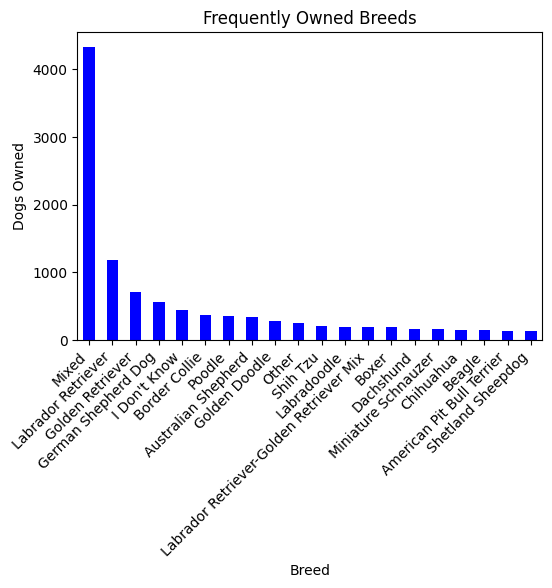

In [70]:
# 1. most owned breed based on maximum of dogs
maxdogslimit = dognitiondf[dognitiondf['Max_Dogs']<= 20]
breedcount = maxdogslimit['Breed'].value_counts().head (20)

plt.figure(figsize = (6, 4))
breedcount.plot( kind = 'bar', color = 'blue')
plt.title('Frequently Owned Breeds')
plt.xlabel('Breed') 
plt.ylabel('Dogs Owned')
plt.xticks(rotation = 45, ha='right')
plt.show()

In [71]:
# 2. interest in breeding (breed to breed type)
breedingtype = dognitiondf[["Breed_Type", "Breed"]]
freqbreedtype = breedingtype.groupby(["Breed_Type", "Breed"]).size().reset_index(name="Count")
print(freqbreedtype)

       Breed_Type                                       Breed  Count
0     Cross Breed          Affenpinscher-Brussels Griffon Mix      1
1     Cross Breed                      Afghan Hound-Akita Mix      1
2     Cross Breed           Afghan Hound-Golden Retriever Mix      1
3     Cross Breed  Airedale Terrier-Catahoula Leopard Dog Mix      1
4     Cross Breed    Airedale Terrier-German Shepherd Dog Mix      1
...           ...                                         ...    ...
1323   Pure Breed                            Wire Fox Terrier     12
1324   Pure Breed                 Wirehaired Pointing Griffon      8
1325   Pure Breed                           Wirehaired Vizsla      1
1326   Pure Breed                              Xoloitzcuintli      5
1327   Pure Breed                           Yorkshire Terrier    132

[1328 rows x 3 columns]


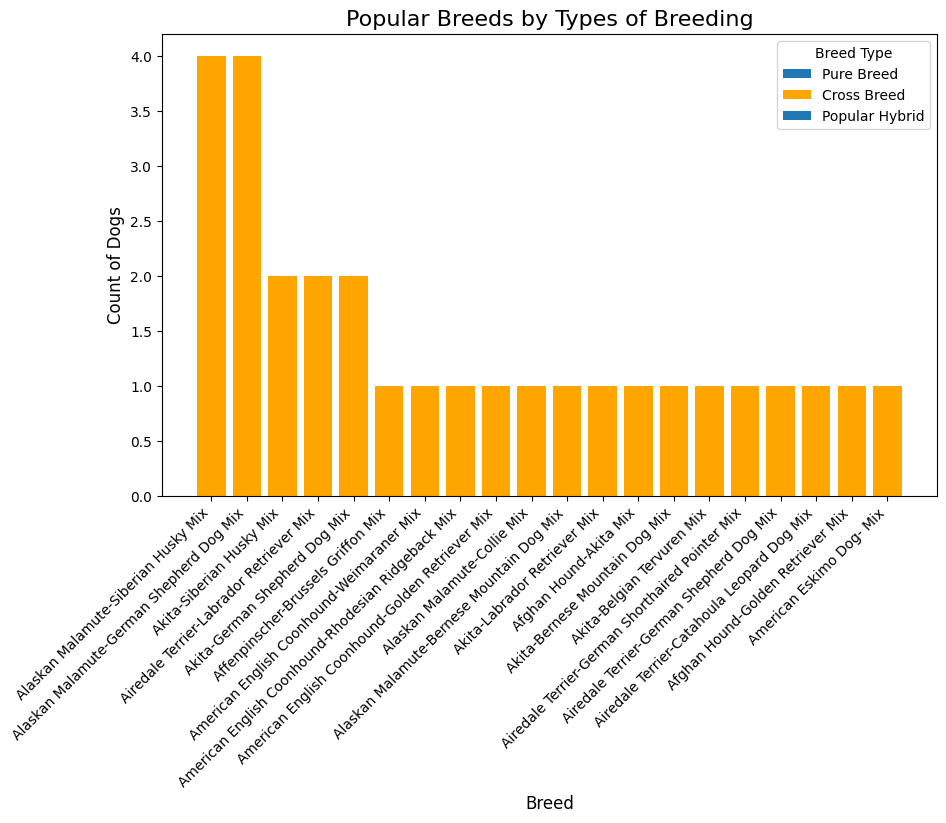

In [72]:
import matplotlib.pyplot as plt
import numpy as np
breeding_type = ['Pure Breed', 'Cross Breed', 'Popular Hybrid']
breedtype = dognitiondf[dognitiondf['Breed_Type'].isin(breeding_type)]
breedcount = breedtype.groupby(['Breed_Type', 'Breed']).size().reset_index(name='Count').head(20)
breedcount_sorted = breedcount.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
for breed_type in breeding_type:
    breed_data = breedcount_sorted[breedcount_sorted['Breed_Type'] == breed_type]
    plt.bar(breed_data['Breed'], breed_data['Count'], label=breed_type, 
            color=color_map.get(breed_type, 'gray'))
plt.title('Popular Breeds by Types of Breeding', fontsize=16)
plt.xlabel('Breed', fontsize=12)
plt.ylabel('Count of Dogs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Breed Type')
plt.show()


In [76]:
# 2. interest in breeding (Users to breed type)
usersbreedingtype = dognitiondf[["User ID", "Breed_Type"]]
usersfreqbreedtype = usersbreedingtype.groupby(["User ID", "Breed_Type"]).size().reset_index(name="Count")
print(usersfreqbreedtype)

                                    User ID                        Breed_Type  \
0      ce134492-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
1      ce134a78-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
2      ce134be0-7144-11e5-ba71-058fbc01cf0b                       Cross Breed   
3      ce134d16-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
4      ce134e42-7144-11e5-ba71-058fbc01cf0b  Mixed Breed/ Other/ I Don't Know   
...                                     ...                               ...   
16626  ce9b2aba-7144-11e5-ba71-058fbc01cf0b                       Cross Breed   
16627  ce9b2eb6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
16628  ce9b306e-7144-11e5-ba71-058fbc01cf0b                    Popular Hybrid   
16629  ce9b33b6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   
16630  ce9b35e6-7144-11e5-ba71-058fbc01cf0b                        Pure Breed   

       Count  
0          2

In [ ]:
breeding_type = ['Pure Breed', 'Cross Breed', 'Popular Hybrid', 'Other']
breedingtype = dognitiondf[dognitiondf['Breed_Type'].isin(breeding_type)]
usercount = breedingtype.groupby(['Breed_Type', 'User ID']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
for breed_type in breeding_type:
    user_data = usercount_sorted[usercount_sorted['Breed_Type'] == breed_type]
    plt.bar(user_data['User ID'], user_data['Count'], label = breed_type, 
            color=color_map.get(breed_type, 'gray'))
plt.figure(figsize=(6, 4))
plt.title('Users Prefferred Breeding Type')
plt.xlabel('Breeding Type')
plt.ylabel('Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# 2. interest in breeding (Users by Breed type)
freqdogowners = dognitiondf[["Max_Dogs", "User ID"]]
freqowns = freqdogowners.groupby(["Max_Dogs", "User ID"]).size().reset_index(name = "Count")
print(freqowns)

In [ ]:
# 3. Dog Ownership (User ID to max dogs)
dognitiondf['Max_Dogs'] = pd.to_numeric(dognitiondf['Max_Dogs'], errors='coerce')
sns.catplot(data=dognitiondf, x='User ID', y='Max_Dogs', kind='strip', jitter=True)



In [ ]:
sns.scatterplot(data = dognitiondf, x = 'Max Dogs', y =  )